# NLP Github Project

In [1]:
import pandas as pd
import re
import unicodedata
import nltk
import prepare
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from math import log
import re
import prepare

In [2]:
df = pd.read_csv('readmes.csv')

In [3]:
#6 languages to explore/predict
df.language.value_counts()

C++       81
php       72
Java      63
Python    46
Rust      36
Ruby      27
Name: language, dtype: int64

In [4]:
df.head()

,Unnamed: 0,language,readme
0,iluwatar/java-design-patterns,Java,Design patterns implemented in Java Introducti...
1,elastic/elasticsearch,Java,Elasticsearch A Distributed RESTful Search Eng...
2,Snailclimb/JavaGuide,Java,点击订阅Java面试进阶指南(专为Java面试方向准备)。为什么要弄这个专栏? Specia...
3,ReactiveX/RxJava,Java,RxJava: Reactive Extensions for the JVM RxJava...
4,spring-projects/spring-boot,Java,Spring Boot Spring Boot makes it easy to creat...


## Java

### Acquire/Prep

In [5]:
df_java = df[df.language == 'Java']

In [6]:
df_java.readme

0     Design patterns implemented in Java Introducti...
1     Elasticsearch A Distributed RESTful Search Eng...
2     点击订阅Java面试进阶指南(专为Java面试方向准备)。为什么要弄这个专栏? Specia...
3     RxJava: Reactive Extensions for the JVM RxJava...
4     Spring Boot Spring Boot makes it easy to creat...
5     Interviews Your personal guide to Software Eng...
6     Retrofit Type-safe HTTP client for Android and...
7     OkHttp An HTTP & HTTP/2 client for Android and...
8     Guava: Google Core Libraries for Java Guava is...
9     ⚡️ A powerful & easy to use chart library for ...
10    Apache Dubbo (incubating) Project Apache Dubbo...
11    Glide | View Glide's documentation | 简体中文文档 | ...
12    Lottie for Android& iOS& React Native& Web& an...
13    Butter Knife Field and method binding for Andr...
14    暂停维护此项目 首先感谢大家支持和反馈才使得proxyee-down能一直迭代到现在的版本，...
15    README of Chinese About AndroidUtilCode 🔥 is a...
16    Project in Maintenance Mode Only The project i...
17    There is an English version of README here

In [7]:
java_readme = ' '.join(df_java.readme)

In [8]:
java_readme = prepare.basic_clean(java_readme)

In [9]:
java_readme = prepare.stem_words(java_readme)

In [10]:
java_readme

"design pattern implement in java introduct design pattern are the best formal practic a programm can use to solv common problem when design an applic or system design pattern can speed up the develop process by provid test proven develop paradigm reus design pattern help prevent subtl issu which caus major problem and it also improv code readabl for coder and architect who are familiar with the pattern get start befor you dive into the materi you should be familiar with variou programmingsoftwar design principl all design should be as simpl as possibl you should start with kiss yagni and do the simplest thing that could possibl work principl complex and pattern should onli be introduc when they are need for practic extens onc you are familiar with these concept you can start drill down into pattern by ani of the follow approach use difficulti tag difficultybeginn difficultyintermedi difficultyexpert use pattern categori creation behavior and other search for a specif pattern can't fin

In [11]:
java_readme = prepare.drop_stop_words(java_readme)

### Explore

In [12]:
#top 10 most frequently used words in Java readmes
pd.Series(java_readme.split()).value_counts().head(10)

use        313
thi        223
licens     193
java       177
build      134
depend     125
spring     122
not        115
boot       112
project    106
dtype: int64

In [13]:
#get all the individual words in the readmes into a list
java_words = list(pd.Series(java_readme.split()))

In [14]:
#Top 20 bigrams
top_20_java_bigrams = (pd.Series(nltk.ngrams(java_words, 2))
                      .value_counts()
                      .head(20))

top_20_java_bigrams.head()

(spring, boot)       79
(java, 8)            46
(licens, may)        34
(overrid, public)    28
(boot, spring)       26
dtype: int64

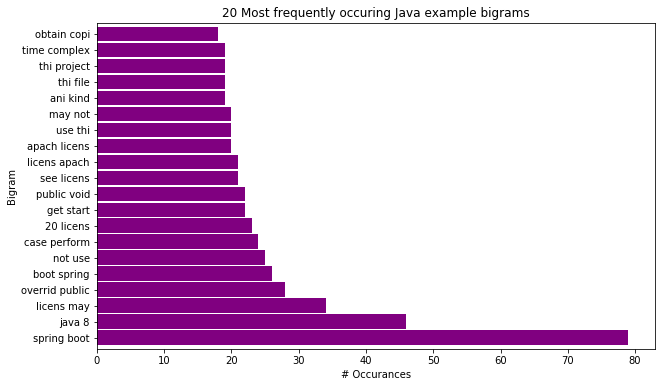

In [15]:
top_20_java_bigrams.plot.barh(color='purple', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Java example bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_java_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

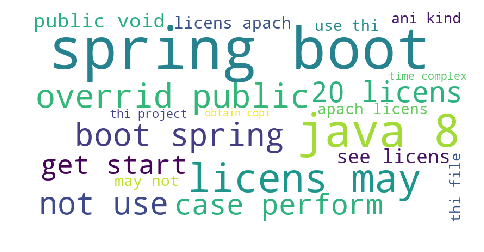

In [16]:
#Wordcloud for java bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_java_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## PHP

### Acquire/Prep

In [17]:
df_php = df[df.language == 'php']

In [18]:
df_php.readme

241    koel Intro Koel (also stylized as koel& with a...
242    whoops PHP errors for cool kids whoops is an e...
243    Sage Sage is a WordPress starter theme with a ...
244    Slim Framework Slim is a PHP micro-framework t...
245    Cachet is a beautiful and powerful open source...
246    Phalcon Framework Phalcon is an open source we...
247    League\Flysystem Flysystem is a filesystem abs...
248    Laravel Debugbar Note for v3: Debugbar is now ...
249    PHP dotenv Loads environment variables from .e...
250    About Flarum Flarum is a delightfully simple d...
251    ramsey/uuid ramsey/uuid is a PHP 7.2+ library ...
252    Motto: "Every business should have a detection...
253    October is a Content Management System (CMS) a...
254    The Dingo API package is meant to provide you&...
255    Laravel 5 IDE Helper Generator For Laravel 4.x...
256    Voyager - The Missing Laravel Admin Made with ...
257    EasyWeChat 📦 It is probably the best SDK in th...
258    Swift Mailer -----------

In [19]:
php_readme = ' '.join(df_php.readme)

In [20]:
php_readme = prepare.clean(php_readme)

In [21]:
php_readme

"koel intro koel also styliz koel lowercas k simpl webbas person audio stream servic written vue client side laravel server side target web develop koel embrac modern web technolog flexbox audio draganddrop api name job instal upgrad guid system requir installationupgrad guid troubleshoot etc head offici document contribut contribut big small warmheartedli welcom pleas note howev want work new featur first open issu make sure it' someth desir thi greatli save time us backer support us monthli donat help us continu activ becom backer sponsor becom sponsor get logo readm github link site becom sponsor whoop php error cool kid whoop error handler framework php outofthebox provid pretti error interfac help debug web project heart it' simpl yet power stack error handl system featur flexibl stackbas error handl standalon librari current no requir depend simpl api deal except trace frame data includ pretti rad error page webapp project includ abil open referenc file directli editor ide includ

### Explore

In [22]:
#top 10 most frequently used words in php readmes
pd.Series(php_readme.split()).value_counts().head(10)

use         624
thi         365
php         295
function    292
new         239
class       218
not         176
file        172
permiss     166
default     156
dtype: int64

In [23]:
#get all the individual words in the readmes into a list
php_words = list(pd.Series(php_readme.split()))

In [24]:
#Top 20 bigrams
top_20_php_bigrams = (pd.Series(nltk.ngrams(php_words, 2))
                      .value_counts()
                      .head(20))

top_20_php_bigrams.head()

(messag, '')          79
('', check)           78
(public, function)    76
(check, valu)         47
(compos, requir)      43
dtype: int64

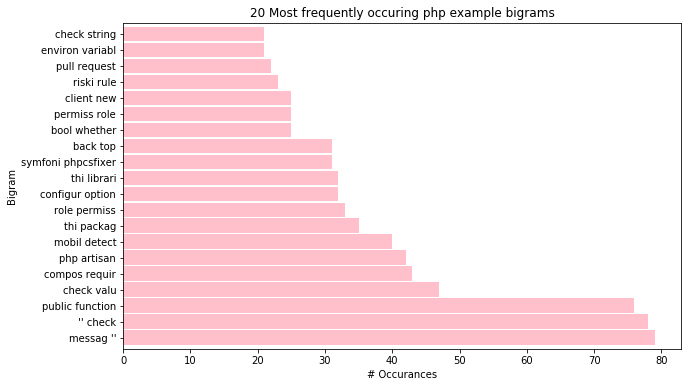

In [25]:
top_20_php_bigrams.plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring php example bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_php_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

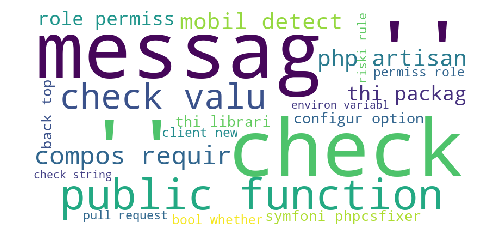

In [26]:
#Wordcloud for php bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_php_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## Python

### Acquire/Prep

In [35]:
df_python = df[df.language == 'Python']

In [36]:
df_python = df_python.readme.fillna('0')

In [42]:
python_readme = ' '.join(df_python)

In [43]:
python_readme = prepare.clean(python_readme)

In [44]:
python_readme

"top languag load english arab bengali brazilian portugues german greek italian korean persian polish russian spanish thai turkish vietnames add translat system design primer motiv learn design largescal system prep system design interview learn design largescal system learn design scalabl system help becom better engin system design broad topic vast amount resourc scatter throughout web system design principl thi repo organ collect resourc help learn build system scale learn open sourc commun thi continu updat open sourc project contribut welcom prep system design interview addit code interview system design requir compon technic interview process mani tech compani practic common system design interview question compar result sampl solut discuss code diagram addit topic interview prep studi guid approach system design interview question system design interview question solut objectori design interview question solut addit system design interview question anki flashcard provid anki fla

### Explore

In [45]:
#top 10 most frequently used words in php readmes
pd.Series(python_readme.split()).value_counts().head(10)

use        546
ye         457
unknown    404
instal     399
no         338
data       265
thi        253
file       242
python     232
learn      218
dtype: int64

In [46]:
#get all the individual words in the readmes into a list
python_words = list(pd.Series(python_readme.split()))

In [47]:
#Top 20 bigrams
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))

top_20_python_bigrams.head()

(ye, unknown)        343
(no, ye)             181
(apikey, ye)         166
(arxiv, preprint)     80
(et, al)              68
dtype: int64

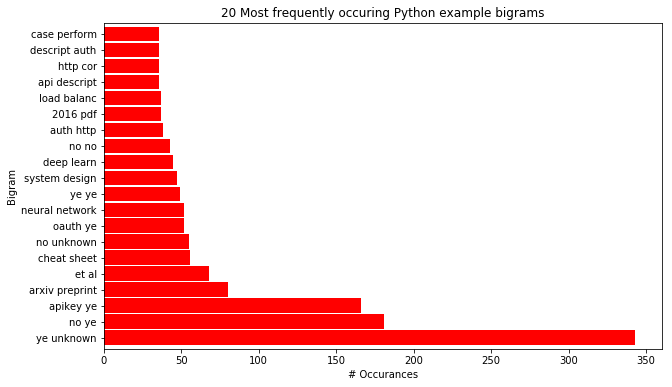

In [49]:
top_20_python_bigrams.plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python example bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

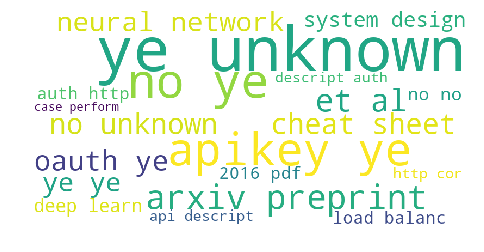

In [50]:
#Wordcloud for php bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_python_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')